In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
y_valid = df_valid['label']

X_train = pd.concat([X_train, X_valid], axis=0)
y_train = pd.concat([y_train, y_valid], axis=0)

# fit and transform scaler on training data
# norm = MinMaxScaler().fit(X_train)
# X_train_norm = norm.transform(X_train)

print(X_train)
X_train.shape, y_train.shape

       Unnamed: 0   0  apache   }  iceberg   [  li  import  td  code  ...  \
0               0   2       0   1        0   7   0       2   0    11  ...   
1               0   0       0   0        0   0   0       0   0     0  ...   
2               0   2       6  24        0   0   0       9   0     0  ...   
3               0  13       0   3        0   0   0       0   0     0  ...   
4               0   1       0  72        0   0   0       0   0     0  ...   
...           ...  ..     ...  ..      ...  ..  ..     ...  ..   ...  ...   
11895           0   0       0   0        0   0   0       0   0     0  ...   
11896           0   3       0  19        0   5   0       9   0     0  ...   
11897           0   2       1   7        0   1   0       7   0     0  ...   
11898           0   6       0  69        0  46   0       0   0     2  ...   
11899           0   0       0   5        0   0   0       0   0     0  ...   

       final  cp  #  do   \  0x18AD    *  struct  <  org  
0          0   0

((47600, 104), (47600,))

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=200, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=200, n_estimators=1000, n_jobs=-1)

In [4]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# transform testing data
# X_test_norm = norm.transform(X_test)

X_test.shape, y_test.shape
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9774789915966386


In [5]:
# visualisation of results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['.html', '.java', '.py', '.c', '.cpp', '.rb', '.php']
confusion_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print(confusion_matrix)

[[1599    0   12    0    2    0    8]
 [   0 1722    0    0    1    0    1]
 [   5    1 1665    1    1    2    0]
 [   0    3    6 1657   54    1    1]
 [   0    1    4  123 1572    1    0]
 [   3    0   21    2    1 1721    0]
 [   7    2    3    1    0    0 1696]]


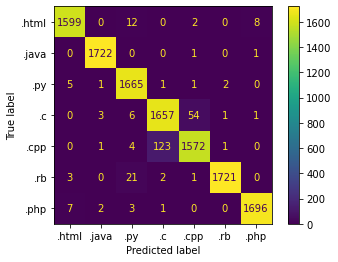

In [6]:
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
display.plot()

In [7]:
# to check count
from collections import Counter

print(Counter(y_pred))
print(Counter(y_test))

Counter({'.c': 1784, '.java': 1729, '.rb': 1725, '.py': 1711, '.php': 1706, '.cpp': 1631, '.html': 1614})
Counter({'.rb': 1748, '.java': 1724, '.c': 1722, '.php': 1709, '.cpp': 1701, '.py': 1675, '.html': 1621})


In [8]:
import pickle
# save the model to disk
pickle.dump(rnd_clf, open('rnd_clf.pkl', 'wb'))